In [36]:
import pandas as pd
import numpy as np

import seaborn as sns
import plotly.express as px
import matplotlib.pyplot as plt
import matplotlib.ticker as mtick
from matplotlib.ticker import MultipleLocator
from matplotlib.ticker import FixedLocator, FixedFormatter
import textwrap 

import glob

import os

In [37]:
import sys
from pathlib import Path

repo_root = Path().resolve().parents[0]
sys.path.append(str(repo_root))

print("Added to sys.path:", repo_root)

from utils.common_functions import save_or_show, load_df


Added to sys.path: D:\Joe\1\Stufffs\Research\Mapping Future Skills in UK Engineering Education


# Deployment

In [38]:
path = r"../data/table-19"
df = load_df(path, skip_rows=13)

In [39]:
def publication_rc():
    plt.rcParams.update({
        "figure.figsize": (12, 6),
        "axes.titlesize": 14,
        "axes.labelsize": 12,
        "xtick.labelsize": 10,
        "ytick.labelsize": 10,
        "legend.fontsize": 10,
        "lines.linewidth": 1.0,
        "axes.titleweight": "bold",
        "axes.labelweight": "bold",
        "legend.frameon": False,
        "font.family": "DejaVu Sans",
    })

In [40]:

def keep_totals_slice(df, filters):
    """
    Filters a DataFrame by multiple equality conditions passed as keyword args.
    Example:
        keep_totals_slice(df,
            {
                "CAH level marker": "CAH level 3",
                "Level of study": "All",
                "Mode of study": "All",
                "Category marker": "Sex",
                "Category": "Female"
            }
        )
    """
    mask = pd.Series(True, index=df.index)
    for col, value in filters.items():
        mask &= df[col].eq(value)
    return df.loc[mask].copy()


#### HESA Graduates Data

In [41]:
slice = { 
    "Country of provider": "All",
    "Permanent address": "All",
    "Level of qualification obtained": "All",
    "Mode of former study": "All",
    "Work type marker": "Paid employment"
}
df_keep = keep_totals_slice(df, slice)

In [42]:
df_keep.sample(10)

,UKPRN,Provider name,Country of provider,Permanent address,Work type marker,Level of qualification obtained,Mode of former study,Standard industrial classification,Academic year,Number
2514319,10000936,The University College of Osteopathy,All,All,Paid employment,All,All,Construction,2019/20,0
68941,10007152,University of Bedfordshire,All,All,Paid employment,All,All,Financial and insurance activities,2017/18,20
4649564,10007139,University of Worcester,All,All,Paid employment,All,All,Total,2020/21,1210
3800115,10006427,University for the Creative Arts,All,All,Paid employment,All,All,Information and communication,2020/21,45
478440,10003193,Hugh Baird College,All,All,Paid employment,All,All,"Arts, entertainment and recreation",2017/18,0
6142652,10001696,Cornwall College,All,All,Paid employment,All,All,Activities of households as employers; undiffe...,2022/23,0
2054099,10005545,Royal Agricultural University,All,All,Paid employment,All,All,Education,2018/19,5
703364,10004599,NCG,All,All,Paid employment,All,All,Mining and quarrying,2017/18,0
6004271,10007785,The University of Bradford,All,All,Paid employment,All,All,Wholesale and retail trade; repair of motor ve...,2022/23,95
2846451,10003566,Kensington College of Business,All,All,Paid employment,All,All,"Arts, entertainment and recreation",2019/20,0


In [43]:
def build_pivot(d):
    pvt = d.pivot_table(index="Academic year", columns="Standard industrial classification",
                        values="Number", aggfunc="sum").fillna(0)
    order = (pvt.index.str.slice(0, 4).astype(int)).argsort()
    pvt = pvt.iloc[order]
    return pvt

In [44]:
df_grad_1 = build_pivot(df_keep)

In [45]:
df_grad_1.head(10)

Standard industrial classification,Accommodation and food service activities,Activities of extraterritorial organisations and bodies,Activities of households as employers; undifferentiated goods-and services-producing activities of households for own use,Administrative and support service activities,"Agriculture, forestry and fishing","Arts, entertainment and recreation",Construction,Education,"Electricity, gas, steam and air conditioning supply",Financial and insurance activities,...,Mining and quarrying,Other service activities,"Professional, scientific and technical activities",Public administration and defence; compulsory social security,Real estate activities,Total,Transportation and storage,Unknown,"Water supply; sewerage, waste management and remediation activities",Wholesale and retail trade; repair of motor vehicles and motorcycles
Academic year,,,,,,,,,,,,,,,,,,,,,
2017/18,14590,75,265,14580,1020,10310,8775,84065,1900,19550,...,1640,4810,57145,27945,5060,434495,5025,2100,1580,33435
2018/19,16085,55,275,13305,1020,8395,8425,81580,2245,19515,...,1435,4450,56550,30650,4870,438385,4570,1980,1510,36480
2019/20,14865,85,230,14445,970,7845,9075,78475,2020,17055,...,1095,4375,56695,31060,4745,432310,4515,2470,1440,35090
2020/21,15825,40,210,17185,835,10060,9710,84150,1990,18625,...,1180,4740,62175,31945,4950,454610,5080,2640,1520,32255
2021/22,17230,65,185,16340,820,11085,8910,80280,2480,21210,...,1325,5265,62700,34070,5105,463935,5825,2785,1745,31315
2022/23,17360,75,175,13740,855,10210,8885,70180,2520,17870,...,1250,4825,50445,34450,4840,417505,5630,2410,1785,29435


#### ONS Vacancies Data

In [46]:
file_path = "../data/ons_vacancies/vacs02nov2025.xlsx"

In [47]:
df_raw = pd.read_excel(file_path)

In [48]:
def load_levels_xlsx(path: str | Path) -> pd.DataFrame:
    """
    Load the 'levels' sheet from an .xlsx where:
      - headers are on row 4 (1-based),
      - data range is rows 4..287 (inclusive),
      - columns A..X.
    """
    path = Path(path)
    df = pd.read_excel(
        path,
        sheet_name="levels",
        usecols="A:X",
        header=3,          # 0-based -> row 4 is header
        nrows=296 - 3,     # rows 4..287 inclusive => 284 rows
        engine="openpyxl"
    )

    df = df.drop(index=[0,1,2])

    # Drop rows that are completely empty
    df = df.dropna(how="all").copy()
    df = df.drop(df.columns[1], axis=1)

    df.columns = df.columns.astype(str).str.strip().str.replace('\n', ' ').str.replace("-", "")

    return df.reset_index(drop=True)

In [49]:
df_vac_1 = load_levels_xlsx("../data/ons_vacancies/vacs02nov2025-edit.xlsx")
df_vac_1.head(5)

,SIC 2007 sections,All vacancies1,Mining and quarrying,Manufacturing,"Electricity, gas, steam and air conditioning supply","Water supply; sewerage, waste management and remediation activities",Construction,Wholesale and retail trade; repair of motor vehicles and motorcycles,Transportation and storage,Accommodation and food service activities,...,"Professional, scientific and technical activities",Administrative and support service activities,Public administration and defence; compulsory social security,Education,Human health and social work activities,"Arts, entertainment and recreation",Other service activities,Total services,Motor Trades,Wholesale
0,Apr-Jun 2001,680,2,75,2,3,31,131,29,59,...,55,41,17,32,79,18,19,568,11.0,27.0
1,May-Jul 2001,674,2,75,2,3,30,130,29,60,...,53,39,16,32,83,17,19,563,10.0,27.0
2,Jun-Aug 2001,663,2,73,3,2,29,129,30,58,...,53,39,16,31,84,16,18,554,9.0,26.0
3,Jul-Sep 2001,663,1,72,3,3,31,122,30,63,...,53,39,16,32,86,16,17,554,10.0,26.0
4,Aug-Oct 2001,639,1,68,3,2,29,120,29,59,...,52,38,15,32,83,15,16,536,10.0,25.0


#### Fix Dates

In [50]:
def fix_grad_dates(df_grad=df_grad_1):
    df_grad_fixed = df_grad.copy().reset_index()

    # Identify the academic year column
    # It is ALWAYS the first column after reset_index()
    academic_col = df_grad_fixed.columns[0]
    
    # Rename it
    df_grad_fixed = df_grad_fixed.rename(columns={academic_col: "AcademicYear"})
    
    # Convert to string safely
    df_grad_fixed["AcademicYear"] = df_grad_fixed["AcademicYear"].astype(str)

    # Extract second year in "2017/18" → "18"
    # Handles formats like "2017/18", "2018-19", "2019_20" etc.
    df_grad_fixed["Year"] = (
        df_grad_fixed["AcademicYear"]
        .str.extract(r"(\d{2})$")    # last two digits
        .astype(int)
        + 2000
    )

    # Set the new index
    df_grad_fixed = df_grad_fixed.set_index("Year")

    # Drop the old academic year column
    df_grad_fixed = df_grad_fixed.drop(columns=["AcademicYear"])
    
    return df_grad_fixed


In [51]:
df_grad = fix_grad_dates()

In [52]:
df_grad.head(6)

Standard industrial classification,Accommodation and food service activities,Activities of extraterritorial organisations and bodies,Activities of households as employers; undifferentiated goods-and services-producing activities of households for own use,Administrative and support service activities,"Agriculture, forestry and fishing","Arts, entertainment and recreation",Construction,Education,"Electricity, gas, steam and air conditioning supply",Financial and insurance activities,...,Mining and quarrying,Other service activities,"Professional, scientific and technical activities",Public administration and defence; compulsory social security,Real estate activities,Total,Transportation and storage,Unknown,"Water supply; sewerage, waste management and remediation activities",Wholesale and retail trade; repair of motor vehicles and motorcycles
Year,,,,,,,,,,,,,,,,,,,,,
2018,14590,75,265,14580,1020,10310,8775,84065,1900,19550,...,1640,4810,57145,27945,5060,434495,5025,2100,1580,33435
2019,16085,55,275,13305,1020,8395,8425,81580,2245,19515,...,1435,4450,56550,30650,4870,438385,4570,1980,1510,36480
2020,14865,85,230,14445,970,7845,9075,78475,2020,17055,...,1095,4375,56695,31060,4745,432310,4515,2470,1440,35090
2021,15825,40,210,17185,835,10060,9710,84150,1990,18625,...,1180,4740,62175,31945,4950,454610,5080,2640,1520,32255
2022,17230,65,185,16340,820,11085,8910,80280,2480,21210,...,1325,5265,62700,34070,5105,463935,5825,2785,1745,31315
2023,17360,75,175,13740,855,10210,8885,70180,2520,17870,...,1250,4825,50445,34450,4840,417505,5630,2410,1785,29435


In [53]:
def fix_vac_dates(df_vac=df_vac_1):
    df = df_vac.copy()

    # First column contains the period (e.g., "Dec-Feb 2025")
    period_col = df.columns[0]

    # Extract year from the period string
    df["Year"] = df[period_col].astype(str).str.extract(r"(\d{4})").astype(int)

    # Convert ALL columns except the period to numeric (coerce errors)
    for col in df.columns:
        if col != period_col and col != "Year":
            df[col] = pd.to_numeric(df[col], errors="coerce")

    # Now safely take the mean for each year
    df_yearly = (
        df.groupby("Year", as_index=False)
          .mean(numeric_only=True)
          .sort_values("Year")
    )

    # If you want the range 2018–2023 only:
    df_yearly = df_yearly[(df_yearly["Year"] >= 2018) & (df_yearly["Year"] <= 2023)].reset_index(drop=True)

    return df_yearly


In [54]:
df_vac = fix_vac_dates()
df_vac.set_index("Year", inplace=True)
df_vac[df_vac.select_dtypes(include=['number']).columns] *= 1000
df_vac.head(10)

,All vacancies1,Mining and quarrying,Manufacturing,"Electricity, gas, steam and air conditioning supply","Water supply; sewerage, waste management and remediation activities",Construction,Wholesale and retail trade; repair of motor vehicles and motorcycles,Transportation and storage,Accommodation and food service activities,Information and communication,...,"Professional, scientific and technical activities",Administrative and support service activities,Public administration and defence; compulsory social security,Education,Human health and social work activities,"Arts, entertainment and recreation",Other service activities,Total services,Motor Trades,Wholesale
Year,,,,,,,,,,,,,,,,,,,,,
2018,8.347500e+05,1000.000000,60333.333333,3500.000000,4000.000000,25166.666667,133666.666667,40833.333333,91583.333333,46916.666667,...,76500.000000,55000.000000,20916.666667,49166.666667,131416.666667,20916.666667,24666.666667,7.406667e+05,15416.666667,29166.666667
2019,8.275833e+05,1750.000000,55666.666667,3250.000000,3916.666667,26250.000000,133583.333333,37833.333333,92000.000000,45166.666667,...,80500.000000,51666.666667,22000.000000,50666.666667,137083.333333,20583.333333,20666.666667,7.370833e+05,15833.333333,30166.666667
2020,5.705000e+05,916.666667,40333.333333,2833.333333,3083.333333,21000.000000,79250.000000,25916.666667,43750.000000,28166.666667,...,54416.666667,39333.333333,20000.000000,38083.333333,121583.333333,11166.666667,11416.666667,5.035000e+05,7666.666667,19333.333333
2021,9.135833e+05,1250.000000,69500.000000,5583.333333,6000.000000,35166.666667,115583.333333,38333.333333,102333.333333,52750.000000,...,88750.000000,66750.000000,29166.666667,52166.666667,159666.666667,22333.333333,19500.000000,7.953333e+05,14250.000000,30583.333333
2022,1.243000e+06,2000.000000,90000.000000,5166.666667,8250.000000,46166.666667,163750.000000,53500.000000,162000.000000,70083.333333,...,124833.333333,80083.333333,35666.666667,69333.333333,210500.000000,32000.000000,23500.000000,1.091917e+06,22666.666667,38083.333333
2023,1.022333e+06,2000.000000,72333.333333,5666.666667,6833.333333,37250.000000,139583.333333,39500.000000,125750.000000,47916.666667,...,99250.000000,63666.666667,34416.666667,63083.333333,186416.666667,25666.666667,22500.000000,8.990000e+05,25333.333333,29333.333333


In [55]:
common_cols = [col for col in df_vac.columns if col in df_grad.columns]

df_grad_clean = df_grad[common_cols].copy()
df_vac_clean  = df_vac[common_cols].copy()



#### Alignment Index (AI)

In [56]:
import pandas as pd

def calculate_alignment_index(df_grad, df_vac, convert_vac_thousands=True):
    """
    Calculate industry-level and overall Alignment Index (AI).

    Parameters:
    df_grad: DataFrame, graduates by industry (indexed by Year)
    df_vac:  DataFrame, vacancies by industry in thousands (indexed by Year)
    convert_vac_thousands: bool, if True multiply df_vac by 1000

    Returns:
    ai_industry: industry-level AI dataframe
    overall_ai: series of overall AI per year
    """

    # Ensure industries match
    common_cols = df_grad.columns.intersection(df_vac.columns)
    grad = df_grad[common_cols].copy()
    vac = df_vac[common_cols].copy()

    # Convert df_vac from thousands → actual vacancies
    # if convert_vac_thousands:
    #     vac = vac * 1000

    # Avoid division by zero
    vac = vac.replace(0, pd.NA)

    # Industry-level Alignment Index
    ai_industry = grad.div(vac)

    # Vacancy share per industry for weighting
    vac_share = vac.div(vac.sum(axis=1), axis=0)

    # Weighted overall Alignment Index per year
    overall_ai = (ai_industry * vac_share).sum(axis=1)

    return ai_industry, overall_ai


In [57]:
print(df_vac_clean.min())
print(df_grad_clean.min())


Mining and quarrying                                                       916.666667
Manufacturing                                                            40333.333333
Electricity, gas, steam and air conditioning supply                       2833.333333
Water supply; sewerage, waste management and remediation activities       3083.333333
Construction                                                             21000.000000
Wholesale and retail trade; repair of motor vehicles and motorcycles     79250.000000
Transportation and storage                                               25916.666667
Accommodation and food service activities                                43750.000000
Information and communication                                            28166.666667
Financial and insurance activities                                       22083.333333
Real estate activities                                                    9500.000000
Professional, scientific and technical activities     

In [58]:
def plot_alignment_index(overall_ai, title="Alignment Index Over Time",
                         out_dir="chart-10",
                         filename="overall_alignment_index",
                         show=True):
    """
    Plot the overall AI across years and save or show depending on settings.
    """
    publication_rc()
    fig = plt.figure(figsize=(10, 5))
    plt.plot(overall_ai.index, overall_ai.values, marker='o', linewidth=2)
    plt.axhline(1, color="gray", linestyle="--")  # equilibrium line

    plt.xlabel("Year")
    plt.ylabel("Alignment Index")
    plt.title(title)
    plt.grid(True, linestyle="--", alpha=0.5)
    plt.tight_layout()

    # Save or show using your custom function
    save_or_show(fig, out_dir=out_dir, filename=filename, show=show)


In [59]:
DEFAULT_ENGINEERING_SECTORS = [
    "Manufacturing",
    "Construction",
    "Information and communication",
    "Electricity, gas, steam and air conditioning supply",
    "Water supply; sewerage, waste management and remediation activities",
    "Professional, scientific and technical activities",
    "Transportation and storage"
]

def wrap_label(label, width=25):
    return "\n".join(textwrap.wrap(label, width))

DEFAULT_ENGINEERING_SECTORS = [
    "Manufacturing",
    "Construction",
    "Information and communication",
    "Electricity, gas, steam and air conditioning supply",
    "Water supply; sewerage, waste management and remediation activities",
    "Professional, scientific and technical activities",
    "Transportation and storage"
]

def plot_sector_ai(ai_industry,
                   sectors=None,
                   title="Sector Alignment Index Over Time",
                   out_dir="chart-10",
                   filename="sector_alignment_index",
                   show=True):

    if sectors is None:
        sectors = DEFAULT_ENGINEERING_SECTORS

    available = [s for s in sectors if s in ai_industry.columns]

    fig = plt.figure(figsize=(12, 6))

    for sector in available:
        plt.plot(
            ai_industry.index,
            ai_industry[sector],
            marker="o",
            linewidth=2,
            label=wrap_label(sector, width=30)
        )

    plt.axhline(1, color="gray", linestyle="--", linewidth=1)

    plt.title(title)
    plt.xlabel("Year")
    plt.ylabel("Alignment Index")
    plt.grid(True, linestyle="--", alpha=0.5)

    plt.legend(loc="upper left", bbox_to_anchor=(1.02, 1.0), frameon=False)

    plt.tight_layout()

    save_or_show(fig, out_dir=out_dir, filename=filename, show=show)



In [60]:
# Calculate AI
ai_industry, overall_ai = calculate_alignment_index(df_grad_clean, df_vac_clean)

# # Visualize
# plot_alignment_index(overall_ai, title="UK Engineering Alignment Index (2018–2023)")


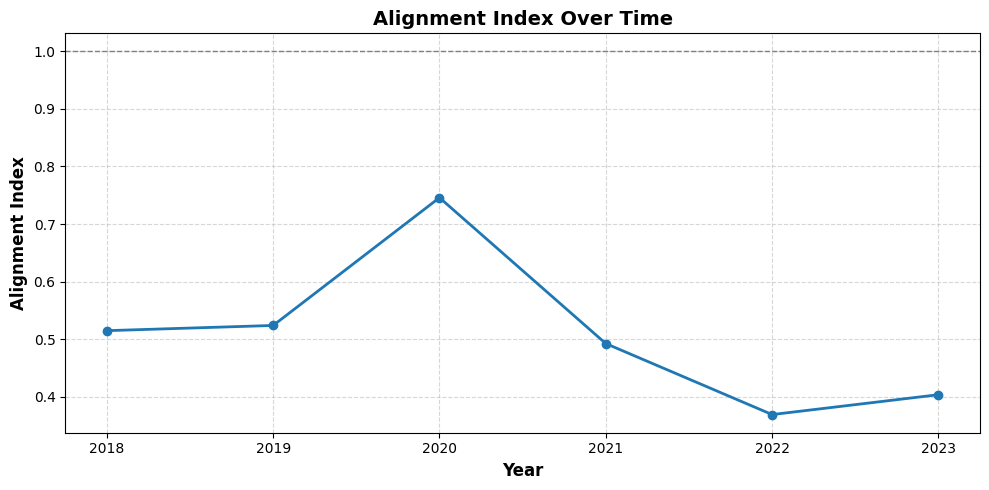

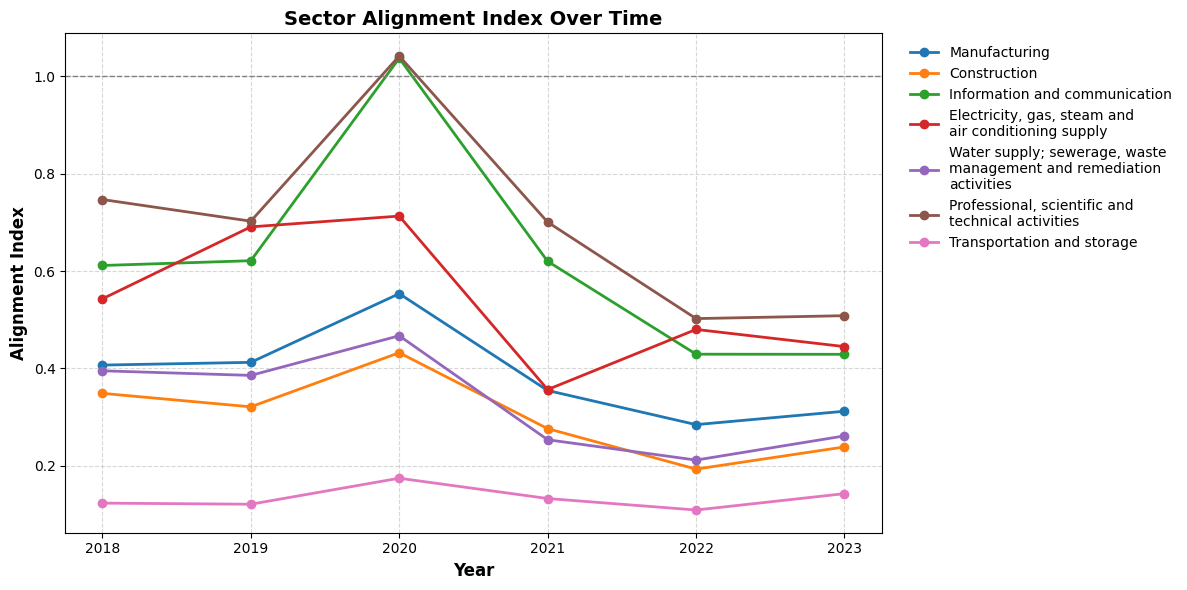

In [61]:
plot_alignment_index(overall_ai)

plot_sector_ai(ai_industry)


In [62]:
df_grad_clean.columns.sort_values()

Index(['Accommodation and food service activities',
       'Administrative and support service activities',
       'Arts, entertainment and recreation', 'Construction', 'Education',
       'Electricity, gas, steam and air conditioning supply',
       'Financial and insurance activities',
       'Human health and social work activities',
       'Information and communication', 'Manufacturing',
       'Mining and quarrying', 'Other service activities',
       'Professional, scientific and technical activities',
       'Public administration and defence; compulsory social security',
       'Real estate activities', 'Transportation and storage',
       'Water supply; sewerage, waste management and remediation activities',
       'Wholesale and retail trade; repair of motor vehicles and motorcycles'],
      dtype='object', name='Standard industrial classification')